<a href="https://colab.research.google.com/github/AmenaEi/my-wotech/blob/main/Titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions:

    1. Dataset Acquisition:
        * Obtain the Titanic dataset. You can download it from reputable sources such as Kaggle (https://www.kaggle.com/c/titanic/data) or use datasets
         available directly through Python libraries.

    2. Exploratory Data Analysis (EDA):
        * Load the Titanic dataset into a Pandas DataFrame.
        * Use Pandas methods to explore and understand the dataset:
            - Display the first few rows to get an overview of the data structure.
            - Check the dimensions of the dataset (number of rows and columns).
            - Identify missing values and decide on strategies for handling them.
            - Compute basic statistics (e.g., mean, median, min, max) for numerical columns.
            - Analyze categorical variables (e.g., value counts).

    3. Data Visualization:
        * Choose one column of the dataset that interests you
        * Use Matplotlib pyplot to create a meaningful visualization:
            - Select an appropriate plot type (e.g., bar chart, histogram, pie chart).
            - Label axes, add a title.
            - Ensure the visualization is clear, informative, and visually appealing. smile

    4. Submission:
        * You can include code snippets, comments explaining your thought process
        * Submit your completed assignment

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('/content/train.csv')

#pd.set_option('display.colheader_justify', 'center')  #how to center-align column headers
#pd.set_option('display.max_columns', None)  # how to show all columns without wrapping
#pd.set_option('display.width', 1000)  # how wide the output should be

print(titanic_df.head(n=4))

   PassengerId  Survived  Pclass                        Name                          Sex     Age  SibSp  Parch       Ticket        Fare   Cabin Embarked
0       1           0        3                              Braund, Mr. Owen Harris    male  22.0    1      0           A/5 21171   7.2500   NaN     S   
1       2           1        1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1      0            PC 17599  71.2833   C85     C   
2       3           1        3                               Heikkinen, Miss. Laina  female  26.0    0      0    STON/O2. 3101282   7.9250   NaN     S   
3       4           1        1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1      0              113803  53.1000  C123     S   


In [ ]:
#the dimensions of the dataset (number of rows and columns)
print(titanic_df.shape)

(891, 12)


In [ ]:
#info about column names, data types (Dtype), how many values NaN
print(titanic_df.info())
print()
print(titanic_df.notna().all())
print()
print(titanic_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

PassengerId     True
Survived        True
Pclass          True
Name            True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare            True
Cabin          False
Embarke

In [ ]:
#basic statistics (e.g., mean, median, min, max) for numerical columns
print(titanic_df.describe())

       PassengerId   Survived     Pclass        Age        SibSp       Parch       Fare   
count  891.000000   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean   446.000000     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std    257.353842     0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000     0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%    223.500000     0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%    446.000000     0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%    668.500000     1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max    891.000000     1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
#categorical variables (e.g., value counts)
print(titanic_df['Sex'].value_counts())
print()
print(titanic_df['Pclass'].value_counts())
print()
print(titanic_df['Embarked'].value_counts(dropna = False))
print()
print(titanic_df['Survived'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64


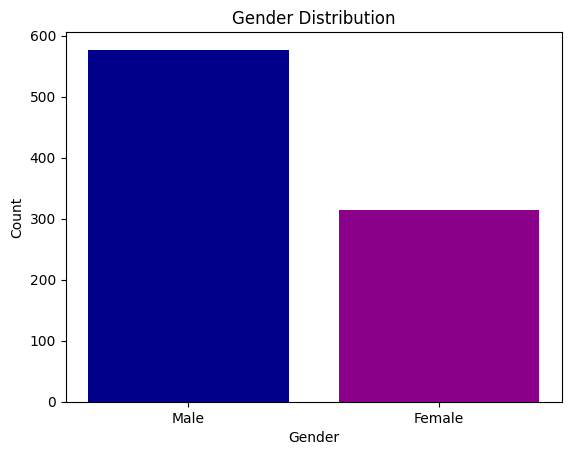

In [ ]:
#Data Visualization

sex_counts = titanic_df['Sex'].value_counts()
colours = ['darkblue', 'darkmagenta']

plt.bar(sex_counts.index.str.capitalize(), sex_counts.values, color=colours)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

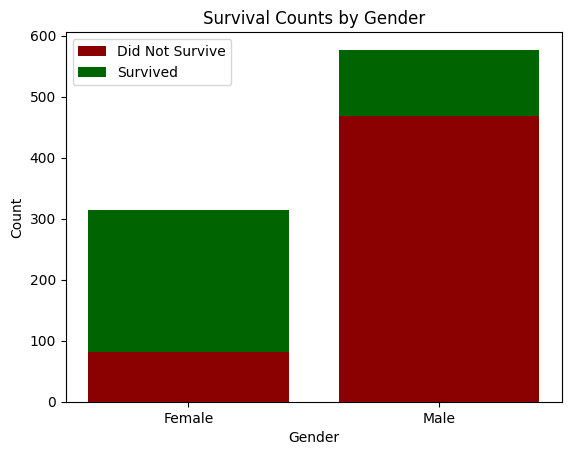

In [ ]:
'''
This groups the data by Sex and Survived, counts the occurrences, and then
unstacks the Survived level to create separate columns for survivors (1) and non-survivors (0).
'''
survival_counts = titanic_df.groupby(['Sex', 'Survived']).size().unstack()

capitalized_labels = survival_counts.index.str.capitalize()

plt.bar(capitalized_labels, survival_counts[0], color='darkred', label='Did Not Survive')
plt.bar(capitalized_labels, survival_counts[1], color='darkgreen', bottom=survival_counts[0], label='Survived')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Counts by Gender')
plt.legend()

plt.show()